# ML Trainingcenter

## Supervised Learning - Assignment 1 : Regression

### Task 1 - Regression Entry Questions

1. What is a linear approach for a dataset $(y, X)$?
    - It assumes that the relationship between the dependent variable $y$ and the independent variables (features) $X$ can be represented by a linear function.
    - y = β0 + β1x1 + ... + βpxp + ε

2. What is the Ordinary Least Squares (OLS) cost function of a linear approach?


3. What is its gradient?


4. How can categorical variables be used as features in a regression problem?


5. Write pseudocode for the Gradient Descent algorithm for the OLS cost function.
    - nitialize the parameters $\theta$ with small random values
    - Set the learning rate $\alpha$
    - Repeat until convergence 
        - Calculate the predicted values: $h_\theta(x^{(i)})$
        - Update the parameters: $\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)}$ for all $j$
    


6. What are possible metrics for evaluating a regression?


7. What forms of regularization do you know for linear regression? How do they differ?


8. What is the purpose of regularization?



### Aufgabe 2 - Entwicklungsdatensatz

Erzeuge einen Testdatensatz $(x, y)$ für ein einfaches lineares Regressionsproblem mit 1000 Datenpunkten unter Verwendung der Koeffizienten $\beta_0 = 6.0$, $\beta_1 = 1.5 $, $\sigma=0.1$ (Varianz der Fehlervariablen) und normalverteilten $x_i$ mit Mittelwert $\mu = 0.5$.  

Schreibe dazu eine Funktion, mit welcher du einfach weitere Testdatensätze erzeugen kannst.  
Verwende `np.random` zur Erzeugung der Zufallszahlen.

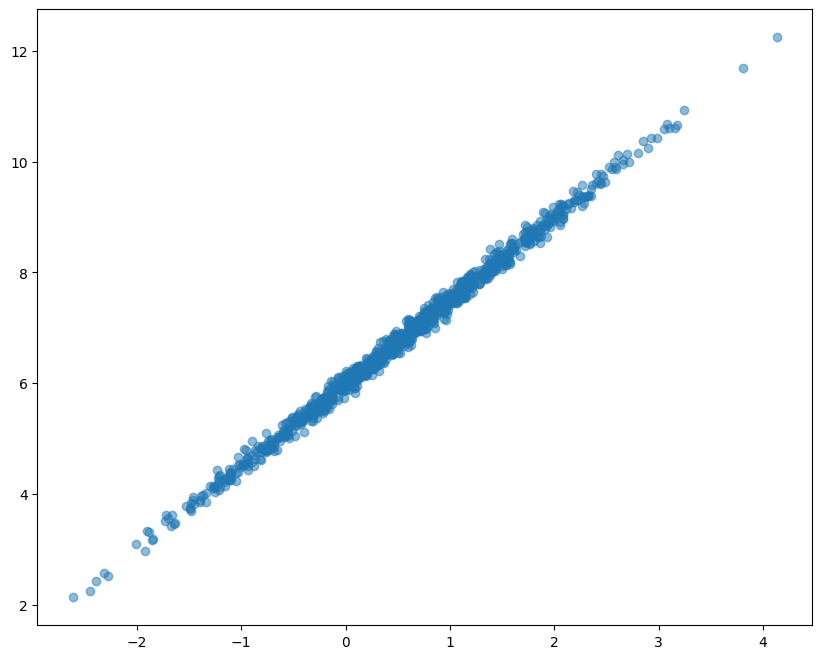

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generate_dataset(n_points, beta_0, beta_1, sigma, mu):
    x = np.random.normal(mu, 1, n_points)
    eps = np.random.normal(0, sigma, n_points)
    y = beta_0 + beta_1 * x + eps
    
    return x, y

x, y = generate_dataset(n_points=1000, beta_0=6.0, beta_1=1.5, sigma=0.1, mu=0.5)

plt.figure(figsize=(10, 8))
plt.scatter(x, y, alpha=0.5)
plt.show()



### Aufgabe 3 - Lineare Regression Gradient Descent

Scikit-learn hat eine sehr einfache und in der Zwischenzeit von vielen Bibliotheken übernommene API für Machine Learning-Methoden. Lies dazu das Paper im Ressources GitLab Repo von Buitinck et al. 2013.

Komplettiere die folgende Klasse dann so, dass wir damit mit Gradient Descent und der OLS-Kostenfunktion einen linearen Ansatz auf einen Datensatz 'fitten' können.

Führe dann auf deinem Testdatensatz eine erste lineare Regression durch. Spiele allenfalls mit den Model-Parametern bis deine Lösung konvergiert.  

Zeichne den Wert der Kostenfunktion als Funktion der Iterationsschritte.  

Plotte schliesslich die Daten als Punkte und darüber die Regressionsgerade.  

Füge eine Methode `.score(X, y)` der Klasse hinzu welche das Bestimmtheitsmass $R^2$ für einen Datensatz $(X, y)$ berechnet und berechne das Bestimmtheismass deines linearen Modells.

In [ ]:
class LinearRegressionGradientDescent(object):
    '''
    This class implements a gradient descent optimizer for the ordinary least squares (OLS) cost function. 
    '''
    
    def __init__(self, init_coef=(0., 0.), epsilon=0.0000001, maxsteps=1000,
                 stepsize=0.001):
        '''
        This class implements a gradient descent optimizer for the least squares cost  
        '''
        self.init_coef = init_coef
        self.coef_ = np.array(self.init_coef)
        self._nsteps = 0
        self.stepsize = stepsize
        self.epsilon = epsilon
        self.maxsteps = maxsteps
    
    
    def fit(self, X, y, verbose=False):
        '''
        Fits the coefficients beta of a linear regression problem
        to the dataset (X, y) .
        '''      
        ### BEGIN SOLUTION
        
        # Gradient Descent
        
        ### END
        
        return self
    
    
    def predict(self, X):
        '''
        Predicts output values y.
        '''
        return X.dot(self.coef_)
    
    
    @staticmethod
    def least_squares_gradient(coef, X, y):
        '''
        Calculates the least squares gradient at position coef
        for the dataset (X, y).
        '''
        ### BEGIN SOLUTION
        
        
        ### END SOLUTION
        
        return gradient
    
    
    def score(self, X, y):
        '''Returns R^2.
        '''
        ### BEGIN SOLUTION
        
        ### END SOLUTION
        
        return Rsquare
        
        
    @staticmethod
    def cost_function(X, y, beta):
        '''
        Calculates the value of a OLS cost function.
        '''
        ### BEGIN SOLUTION
      
        ### END SOLUTION
        
        return OLScost
    

### Aufgabe 4 - Annahmen eines linearen Modells

1. Was sind die Annahmen eines linearen Modells?
2. Wie können sie grafisch untersucht werden?

(Das Skript von Stahel bietet hierzu eine tiefgehende Auseinandersetzung.)

### Aufgabe 5 - Koeffizienten Ebene

Verwende den folgenden Code, um für die zwei Koeffizienten $(\beta_0, \beta_1)$ des linearen Ansatzes für den Entwicklungsdatensatz die Werte der Kostenfunktion als Äquipotentiallinien zu zeichnen.  

Zeichne dann den Weg der von deinem Gradient Descent-Algorithmus von einem beliebigen Startort innerhalb des Plots weg beschritten wird als rote Kurve in den Plot.

In [ ]:
def create_contour_plot(X, y, betalims=(-10., 10.), resolution=.2, ax=None):

    # create meshgrid
    xx1, xx2 = np.meshgrid(np.arange(betalims[0], betalims[1], resolution),
                         np.arange(betalims[0], betalims[1], resolution))

    Z = []
    for b0, b1 in zip(xx1.ravel(), xx2.ravel()):
        Z.append(LinearRegressionGradientDescent.cost_function(X, y, np.array([b0, b1])))

    Z = np.array(Z).reshape(xx1.shape)

    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 8))
    else:
        fig = None

    ax.contour(xx1, xx2, Z, levels=np.linspace(Z.min(), Z.max(), 20))
    ax.set_ylabel(r'$\beta_1$')
    ax.set_xlabel(r'$\beta_0$')
    
    if fig is not None:
        return fig, ax

### Aufgabe 6 - Diabetes Datensatz, Model Selection

Lade den 'diabetes'-Datensatz (`data/diabetes.csv`) in ein pandas DataFrame und gib die ersten 10 Zeilen aus.  

Visualisiere den Datensatz.  

Wir wollen den Output-Wert $Y$, eine Messgrösse die mit Diabetes assoziiert ist, vorhersagen.
Entwickle dazu drei Modelle durch Verwendung der entsprechenden scikit-learn Estimators: 1. ein lineares Modell, 2. ein Ridge-Regression Modell, 3. ein Lasso-Modell.

Wie kannst du einen optimalen Wert für die Regularisierungsstärke $\alpha$ in den regularisierten Modellen bestimmen? Wie kannst du die Vohersagekraft der Modelle sinnvoll messen?

Wie unterscheiden sie sich hinsichtlich $R^2$ und MAE?